# <center> Predicting Credit Scores for Loan Applicants


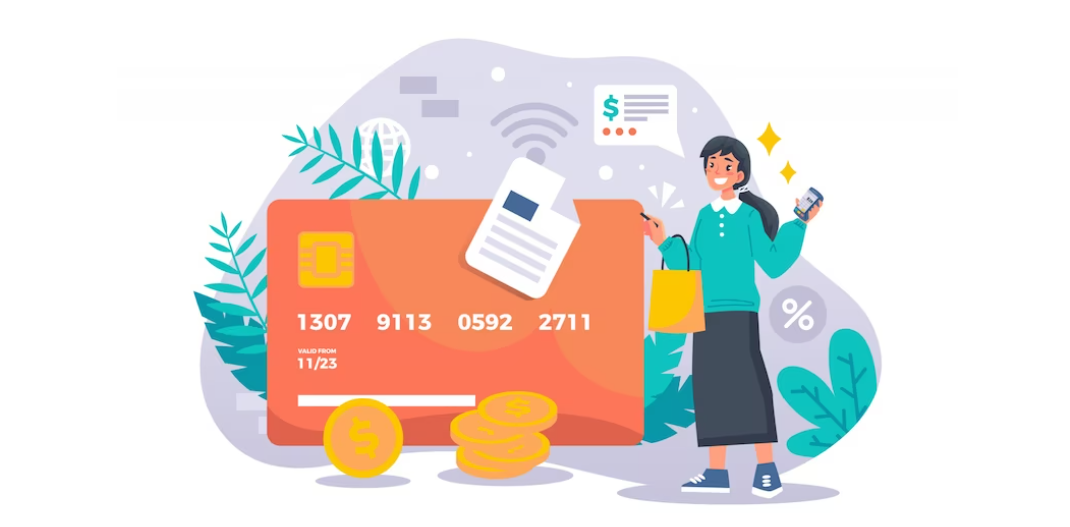

Problem Statement:

Credit scores are crucial indicators of an individual's creditworthiness, impacting loan approvals, interest rates, and financial opportunities. To enable lending institutions to assess risk and borrowers to access better financial products, this case study aims to build a supervised machine learning model using a provided dataset. The objective is to predict the creditworthiness of loan applicants and categorize them into 'Good' or 'Bad' credit classes. By doing so, the model will assist institutions in making informed decisions about granting loans and minimizing potential losses, fostering financial stability for both lenders and borrowers. Compare the performance of different models and choose the best-performing one.


Task 1: Data Exploration and Understanding

- Explore the dataset and its features.
- Understand the data types and descriptions of each feature.
- Check for missing values and handle them appropriately.
- Perform basic statistical analysis to gain insights into the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("cdata.xlsx")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,less than a year,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",more than 3 years,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,more than 3 years,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,1 to 2 years,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,more than 3 years,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [4]:
df.shape

(1000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

In [6]:
df.describe()

,Cdur,Camt,InRate,age,NumCred,Ndepend
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,32592.58000,2.973000,35.546000,1.407000,1.155000
std,12.058814,28227.36876,1.118715,11.375469,0.577654,0.362086
min,4.000000,2380.00000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,13535.00000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,23075.00000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,39602.50000,4.000000,42.000000,2.000000,1.000000
max,72.000000,184120.00000,4.000000,75.000000,4.000000,2.000000


In [7]:
df.dtypes


Cbal           object
Cdur            int64
Chist          object
Cpur           object
Camt            int64
Sbal           object
Edur           object
InRate          int64
MSG            object
Oparties       object
Rdur           object
Prop           object
age             int64
inPlans        object
Htype          object
NumCred         int64
JobType        object
Ndepend         int64
telephone      object
foreign        object
creditScore    object
dtype: object

In [8]:
df.columns

Index(['Cbal', 'Cdur', 'Chist', 'Cpur', 'Camt', 'Sbal', 'Edur', 'InRate',
       'MSG', 'Oparties', 'Rdur', 'Prop', 'age', 'inPlans', 'Htype', 'NumCred',
       'JobType', 'Ndepend', 'telephone', 'foreign', 'creditScore'],
      dtype='object')

In [9]:
df.isnull().sum()

Cbal           0
Cdur           0
Chist          0
Cpur           0
Camt           0
Sbal           0
Edur           0
InRate         0
MSG            0
Oparties       0
Rdur           0
Prop           0
age            0
inPlans        0
Htype          0
NumCred        0
JobType        0
Ndepend        0
telephone      0
foreign        0
creditScore    0
dtype: int64

Insights got from task1:

- The dataset has 1000 rows and 21 columns
- Our data contains the combination of both object type and numeric type columns.
- Our target column is Credit Score where as the other 20 columns are independant columns.
- Our target column is a categorical column with categories such as Good and Bad
- Our data doesnot have any null values and hence no need to worry about them.

Task 2: Data Preprocessing

- Convert categorical variables into numerical representation (e.g., one-hot encoding or label encoding).
- Scale or normalize numerical features as needed.
- Split the dataset into the feature matrix (X) and the target variable (y).




In [10]:
df['creditScore'].value_counts()

good    700
bad     300
Name: creditScore, dtype: int64

In [11]:
all_columns = df.columns.tolist()

categorical_columns = [col for col in all_columns if df[col].dtype == 'object']

del categorical_columns[-1]
categorical_columns

['Cbal',
 'Chist',
 'Cpur',
 'Sbal',
 'Edur',
 'MSG',
 'Oparties',
 'Rdur',
 'Prop',
 'inPlans',
 'Htype',
 'JobType',
 'telephone',
 'foreign']

In [12]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['Cdur', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend']


In [13]:
df.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,less than a year,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",more than 3 years,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,more than 3 years,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,1 to 2 years,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,more than 3 years,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

object_columns = df.select_dtypes(include='object').columns.tolist()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through each object-type column and label encode its values
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame with label-encoded values
df.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0,9,1,0,13790,2,0,2,2,0,2,3,27,0,1,1,1,1,1,0,1
1,0,15,2,3,15250,4,3,4,3,2,3,3,50,1,1,2,1,1,1,0,1
2,0,36,3,0,19410,2,3,4,3,0,3,1,61,1,0,1,0,1,1,0,0
3,0,48,3,0,144090,2,0,2,3,0,0,0,25,1,1,1,1,1,1,0,0
4,3,24,1,3,31690,2,2,4,1,0,3,2,26,1,1,1,1,1,1,0,1


In [15]:
col=df.columns.tolist()
col=col[:-1]
col

['Cbal',
 'Cdur',
 'Chist',
 'Cpur',
 'Camt',
 'Sbal',
 'Edur',
 'InRate',
 'MSG',
 'Oparties',
 'Rdur',
 'Prop',
 'age',
 'inPlans',
 'Htype',
 'NumCred',
 'JobType',
 'Ndepend',
 'telephone',
 'foreign']

In [16]:
from sklearn.preprocessing import StandardScaler

# Assuming 'numerical_columns' contains the names of numerical columns in the dataset
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])
df.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,-1.262865,-0.987573,-0.514205,-1.627966,-0.666445,-0.130531,-1.134975,-0.870183,-0.135388,-0.303686,0.272378,1.263992,-0.751642,-2.154977,-0.133710,-0.704926,-0.289639,-0.42829,1.214598,-0.196014,1
1,-1.262865,-0.489762,1.072848,-0.585734,-0.614696,1.669901,1.097762,0.918477,0.845685,3.885083,1.046179,1.263992,1.271265,0.218346,-0.133710,1.027079,-0.289639,-0.42829,1.214598,-0.196014,1
2,-1.262865,1.252574,2.659902,-1.627966,-0.467248,-0.130531,1.097762,0.918477,0.845685,-0.303686,1.046179,-0.381831,2.238742,0.218346,-2.016956,-0.704926,-1.346717,-0.42829,1.214598,-0.196014,0
3,-1.262865,2.248194,2.659902,-1.627966,3.951952,-0.130531,-1.134975,-0.870183,0.845685,-0.303686,-1.275224,-1.204743,-0.927547,0.218346,-0.133710,-0.704926,-0.289639,-0.42829,1.214598,-0.196014,0
4,1.131948,0.256953,-0.514205,-0.585734,-0.031991,-0.130531,0.353517,0.918477,-1.116461,-0.303686,1.046179,0.441081,-0.839594,0.218346,-0.133710,-0.704926,-0.289639,-0.42829,1.214598,-0.196014,1


In [17]:
X = df.drop('creditScore', axis=1)
y = df['creditScore']


### Insights

- All the object type columns are label encoded as it is on of the technique to convert a object type column to a numeric type column.
- standadization helps to scale the data helping in better accuracy of the model

Task 3: Data Visualization

- Visualize the distribution of the target variable 'CreditScore.'
- Explore relationships between various features and the target variable using plots (e.g., bar plots, box plots, scatter plots).



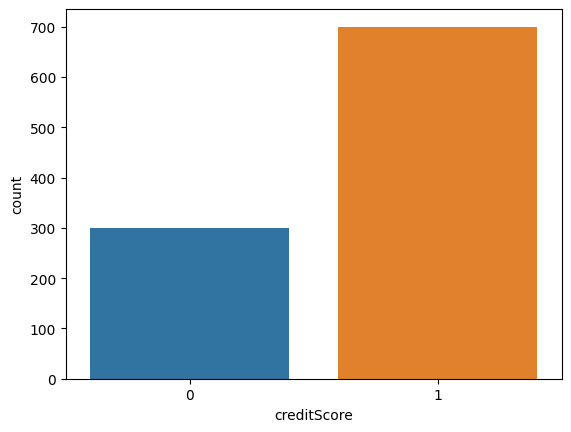

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='creditScore', data=df)
plt.show()

Insights:

- the number of people having good credit score are more compared to bad.

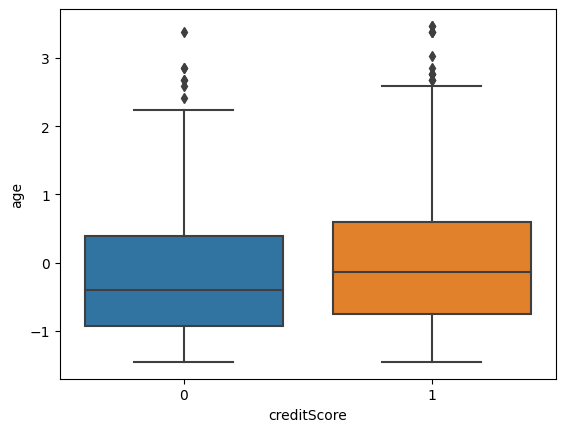

In [30]:
# Assuming 'feature1', 'feature2', etc., represent the names of features to explore relationships
sns.boxplot(x='creditScore', y='age', data=df)
plt.show()

Insights:

- above plot shows outliers
- handling this is not important because we can have a person whose as is less and has credit card and a person with more age who has credit card.

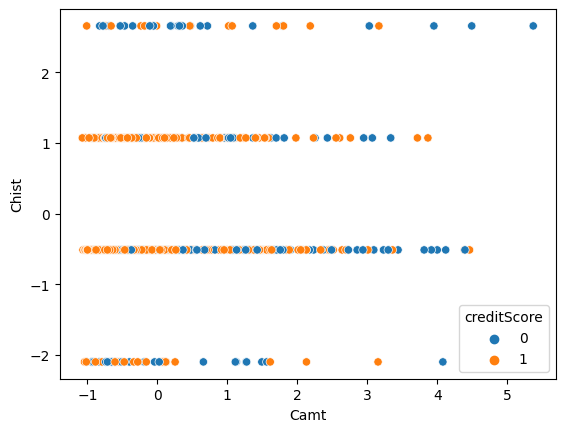

In [31]:
sns.scatterplot(x='Camt', y='Chist', hue='creditScore', data=df)
plt.show()

Task 4: Model Selection and Preparation

- Select appropriate classification algorithms for the prediction task (Note: Try to implement all the supervised algorithms).
- Create a training and testing split for the dataset.



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Task 5: Model Training and Evaluation


- Train the selected classification models on the training data.
- Evaluate the models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC on the test data.
- Compare the performance of different models and choose the best-performing one.


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Create a dictionary of models with their respective classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Model: {name}\nAccuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, AUC-ROC: {auc_roc:.2f}\n")

Model: Logistic Regression
Accuracy: 0.78, Precision: 0.76, Recall: 0.78, F1-score: 0.75, AUC-ROC: 0.75

Model: Decision Tree
Accuracy: 0.68, Precision: 0.70, Recall: 0.68, F1-score: 0.69, AUC-ROC: 0.64

Model: Random Forest
Accuracy: 0.81, Precision: 0.80, Recall: 0.81, F1-score: 0.79, AUC-ROC: 0.81

Model: KNN
Accuracy: 0.76, Precision: 0.74, Recall: 0.76, F1-score: 0.74, AUC-ROC: 0.74

Model: XGBoost
Accuracy: 0.78, Precision: 0.77, Recall: 0.78, F1-score: 0.77, AUC-ROC: 0.79

Model: SVM
Accuracy: 0.78, Precision: 0.77, Recall: 0.78, F1-score: 0.76, AUC-ROC: 0.76



Insights:

- we have trained and tested accuracy for all models
- we choose XGboost as it gives good accuracy.
- we can choose other algos too if needed.
- we can still improve our accuracy by performing hyper parameter tuning

Task 6: Hyperparameter Tuning


- Perform hyperparameter tuning for the chosen model to optimize its performance.
- Utilize techniques such as Grid Search or Random Search for tuning.


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [25]:
xgb_grid = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_param_grid, scoring='accuracy', cv=5)

In [26]:
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [27]:
best_xgb_params = xgb_grid.best_params_
best_xgb_model = xgb_grid.best_estimator_
print("Best Parameters for XGBoost:", best_xgb_params)

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}


In [29]:
y_xgb_pred = best_xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_xgb_pred)
xgb_precision = precision_score(y_test, y_xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, y_xgb_pred, average='weighted')
xgb_f1 = f1_score(y_test, y_xgb_pred, average='weighted')
xgb_auc_roc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

print("Best-Tuned XGBoost Model Performance:")
print("Accuracy:", xgb_accuracy)

Best-Tuned XGBoost Model Performance:
Accuracy: 0.79


Insights:

- As we can see our accuracy has improved a little.
- We can make our case study more advance. Make sure to try adding more of your knowledge and make it more better.

## <center> Thankyou